In [2]:
%load_ext autoreload
%autoreload 2

In [5]:

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import torch
from ppo import PPOAGENT
from DQN import DQNAGENT
from sac import SACAgent
from td3 import TD3Agent

In [4]:
def plot_mean_std_curves(all_rewards_dict, title='Learning Curve', xlabel='Episode', ylabel='Reward'):
    plt.figure(figsize=(10, 6))
    for label, rewards in all_rewards_dict.items():
        mean_rewards = rewards.mean(axis=0)
        std_rewards = rewards.std(axis=0)
        episodes = np.arange(len(mean_rewards))
        plt.plot(episodes, mean_rewards, label=label)
        plt.fill_between(episodes, mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.2)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Continuous Action Space

### Experiment 1: Pendulum-v1

In [8]:
env = gym.make("Pendulum-v1")
num_episodes = 200
training_time = 480  # 480 seconds = 8 minutes

In [9]:
def run_td3_variant(agent, env, num_episodes=200, seeds=[42, 7, 99]):
    all_rewards = []

    for seed in seeds:
        env.reset(seed=seed)
        np.random.seed(seed)
        torch.manual_seed(seed)

        rewards = agent.learn(num_episodes=num_episodes)
        all_rewards.append(rewards)

    return np.array(all_rewards)  # Shape: (seeds, episodes)

In [10]:
td3 = TD3Agent(
    env=env,
    lr=1e-3,
)

td3_rewards = run_td3_variant(td3, env, num_episodes=num_episodes)

100%|██████████| 200/200 [01:25<00:00,  2.33it/s]


In [11]:
td3_initial_random = TD3Agent(env=env, lr=1e-3, start_steps=1000)

td3_initial_random_rewards = run_td3_variant(td3_initial_random, env, num_episodes=num_episodes)

100%|██████████| 200/200 [01:28<00:00,  2.27it/s]


In [12]:
td3_more_random = TD3Agent(env=env, lr=1e-3, start_steps=1000,
                           expl_noise=0.2)
td3_more_random_rewards = run_td3_variant(td3_more_random, env, num_episodes=num_episodes)

100%|██████████| 200/200 [01:38<00:00,  2.03it/s]


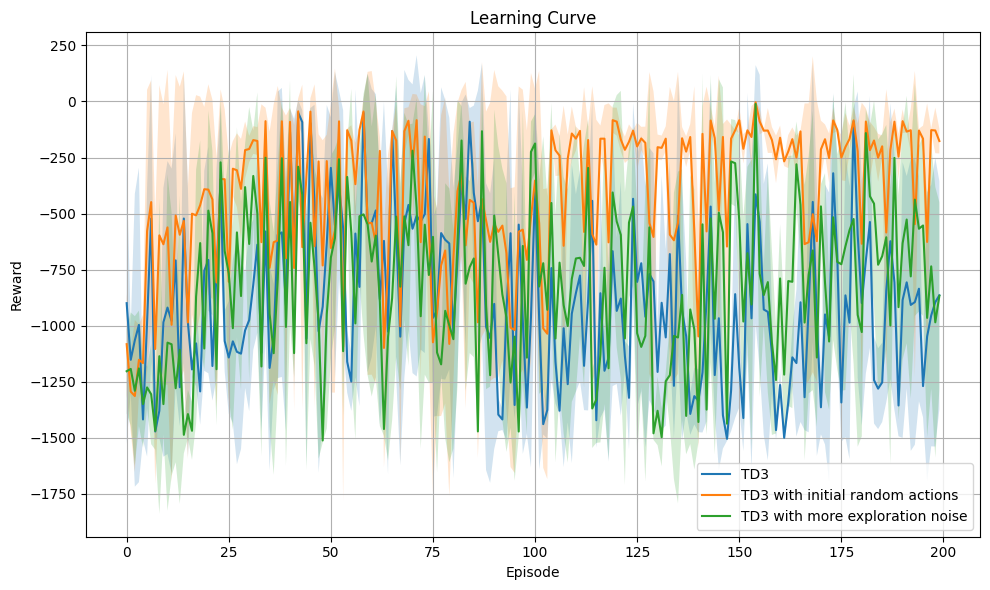

In [13]:
plot_mean_std_curves({
    "TD3": td3_rewards,
    "TD3 with initial random actions": td3_initial_random_rewards,
    "TD3 with more exploration noise": td3_more_random_rewards
})